In [ ]:
# 🔄 Downgrade a versiones compatibles y reinicia
!pip install numpy==1.24.4 pandas==1.5.3 ydata-profiling==4.6.2 --quiet
import os; os.kill(os.getpid(), 9)


In [ ]:
# Selección de librerias para trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el dataset seleccionado
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Primera exploración
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Valores nulos por columna:
id                     0
gender                 0
age                    0
hypertension           0
he

## EDA


In [ ]:
# Resumen estadístico general
print(df.describe(include='all'))

# Revisar valores nulos por columna
print(df.isnull().sum())

        gender          age  hypertension  heart_disease ever_married  \
count     4909  4909.000000   4909.000000    4909.000000         4909   
unique       3          NaN           NaN            NaN            2   
top     Female          NaN           NaN            NaN          Yes   
freq      2897          NaN           NaN            NaN         3204   
mean       NaN    42.865374      0.091872       0.049501          NaN   
std        NaN    22.555115      0.288875       0.216934          NaN   
min        NaN     0.080000      0.000000       0.000000          NaN   
25%        NaN    25.000000      0.000000       0.000000          NaN   
50%        NaN    44.000000      0.000000       0.000000          NaN   
75%        NaN    60.000000      0.000000       0.000000          NaN   
max        NaN    82.000000      1.000000       1.000000          NaN   

       work_type Residence_type  avg_glucose_level          bmi  \
count       4909           4909        4909.000000  4909

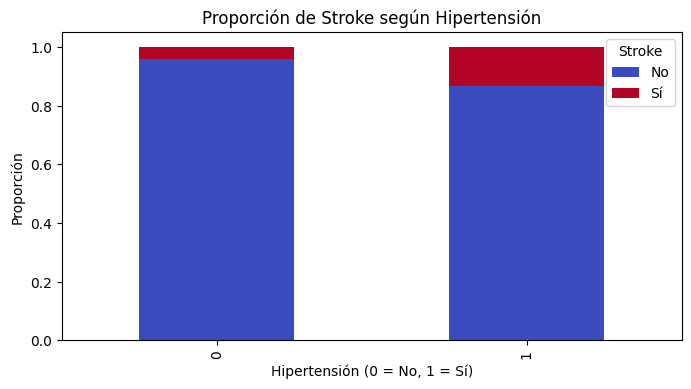

In [ ]:
# Crear tabla de proporciones
proportions = df.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack()

# Gráfico de barras apiladas
proportions.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='coolwarm')
plt.title('Proporción de Stroke según Hipertensión')
plt.xlabel('Hipertensión (0 = No, 1 = Sí)')
plt.ylabel('Proporción')
plt.legend(title='Stroke', labels=['No', 'Sí'])
plt.show()


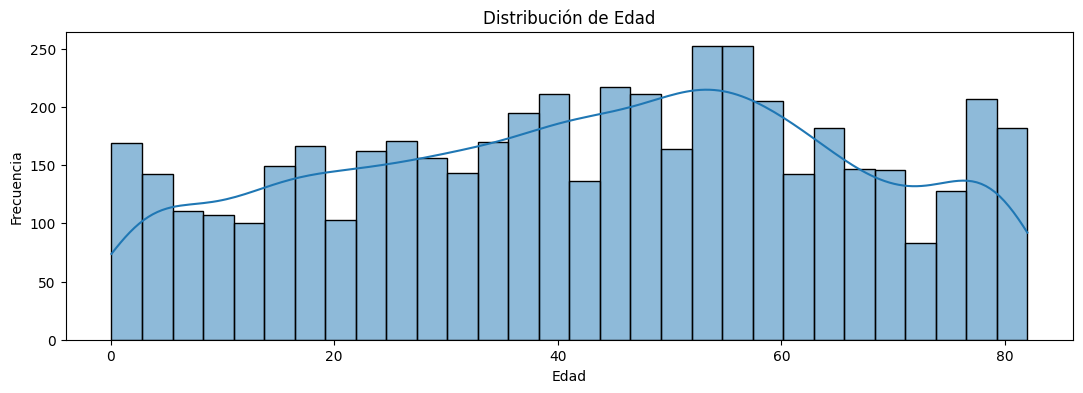

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de edades
plt.figure(figsize=(13, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

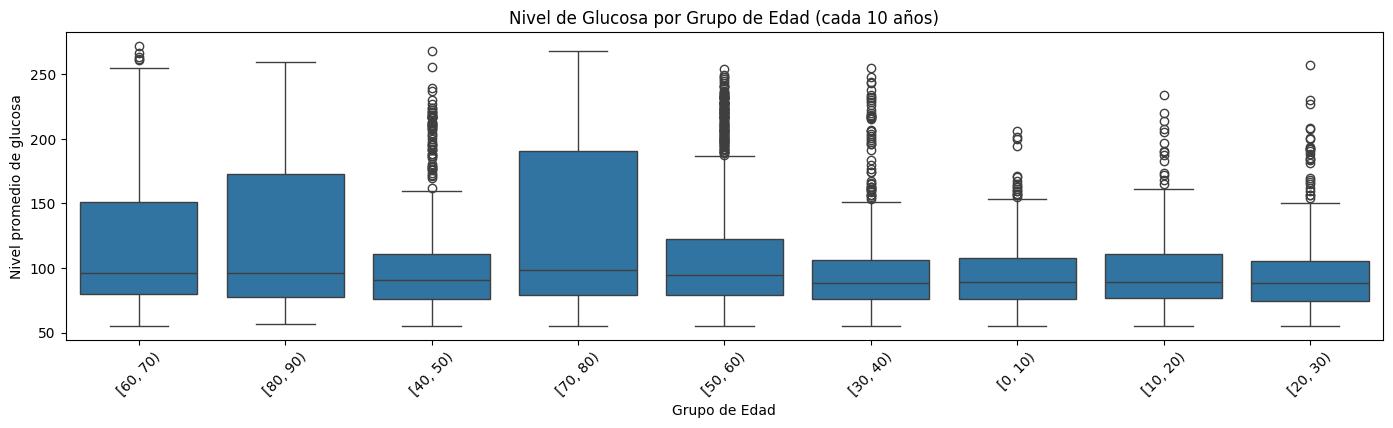

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear categorías de edad cada 10 años
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False, include_lowest=True)

# Ordenar categorías para que aparezcan en orden en el gráfico
df['age_group'] = df['age_group'].astype(str)

# Boxplot de glucosa por grupo de edad
plt.figure(figsize=(17, 4))
sns.boxplot(x='age_group', y='avg_glucose_level', data=df)
plt.title('Nivel de Glucosa por Grupo de Edad (cada 10 años)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Nivel promedio de glucosa')
plt.xticks(rotation=45)
plt.show()


### EDA AUTOMATIZADO CON PROFILING

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="EDA completo", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Análisis Ético (Detección de Sesgos)

1. Métricas de Equidad: Chi-Cuadrado entre stroke y gender

In [ ]:
from scipy.stats import chi2_contingency

contingencia = pd.crosstab(df['gender'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")


Chi-cuadrado: 0.27843022275621393
p-valor: 0.8700408526403285


2. Fairlearn Dashboard (visualización de disparidades)

    Distribución de la variable objetivo por grupo.

    Disparidades en tasas de aprobación/rechazo.

    Comparación de métricas básicas (ej.: proporciones).

estamos usando esta version para COLAB, parajupyter notebook es un deshboard con vizualisaciones

In [ ]:
!pip install fairlearn --quiet


In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Entrenamiento del modelo
# Usamos 'df' en lugar de 'df_clean' ya que 'df' es el dataframe que hemos limpiado.
X = df[['age', 'avg_glucose_level', 'bmi']]
y = df['stroke']
sensitive_feature = df['gender']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression(solver='liblinear') # Especificamos un solver para evitar warnings
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Aseguramos que sensitive_features coincida con los índices de y_test
sensitive_feature_test = sensitive_feature.loc[y_test.index]

# Crear métricas con fairlearn
metric_frame = MetricFrame(
    metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature_test
)

print("Métricas por grupo sensible (género):")
print(metric_frame.by_group)

# Diferencias de equidad
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_feature_test)
eo_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_feature_test)

print(f"\nDiferencia de paridad demográfica: {dp_diff:.4f}")
print(f"Diferencia de igualdad de oportunidades: {eo_diff:.4f}")

Métricas por grupo sensible (género):
        accuracy selection_rate
gender                         
Female  0.961057            0.0
Male    0.958743            0.0

Diferencia de paridad demográfica: 0.0000
Diferencia de igualdad de oportunidades: 0.0000


Identificación de variables Proxy

In [ ]:
# Ver primeras filas (pueden sugerir proxies como work_type, residence_type)
print(df.head())

# Buscar correlaciones de categóricas con la variable target
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(f"\nDistribución de stroke por: {col}")
    print(df.groupby(col)['stroke'].mean())


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  

Distribución de stroke por: gender
gender
Female    0.041422
Male      0.044257
Other     0.000000
Name: stroke, dtype: float64


##Limpieza de Datos
1.1. Detectar y manejar valores faltantes (NaN)

In [ ]:
 #Eliminamos valores nulos
df = df.dropna()

# Eliminamos 'id' porque no aporta al modelo
df = df.drop(columns=['id'], errors='ignore') #Usamos errors='ignore' para evitar un KeyError si la columna 'id' no existe


In [ ]:
# Ver cuántos valores faltantes hay por columna
print("Valores faltantes por columna:")
print(df.isnull().sum())

# eliminar filas con valores faltantes
df_clean = df.dropna()
print(f"Filas después de eliminar nulos: {df_clean.shape[0]}")

#o imputar con la media:
#df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


Valores faltantes por columna:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Filas después de eliminar nulos: 4909


1.2. Detectar outliers (valores extremos)
Podemos usar el método IQR (rango intercuartílico) para detectar y eliminar outliers en columnas como age, avg_glucose_level, bmi:

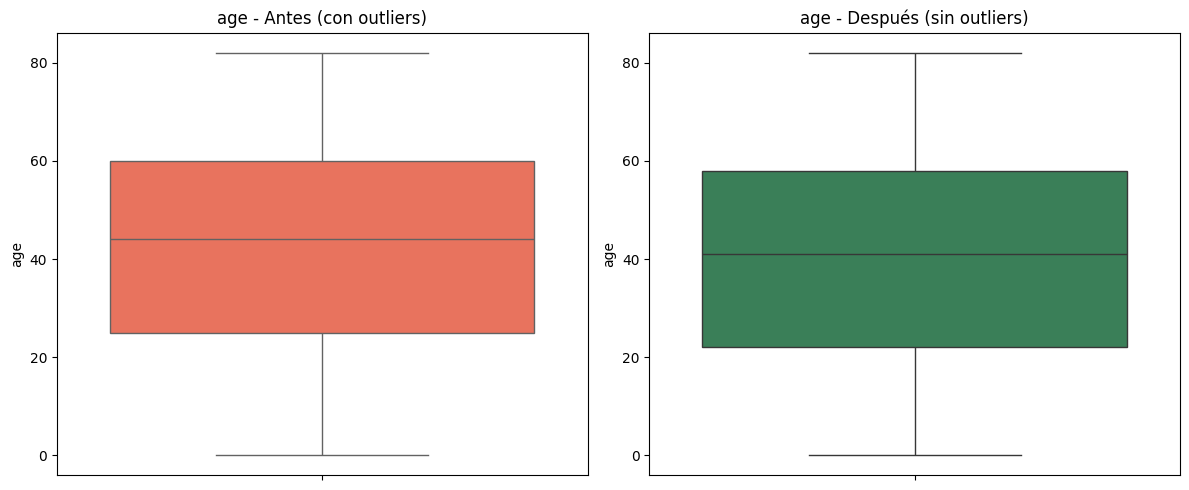

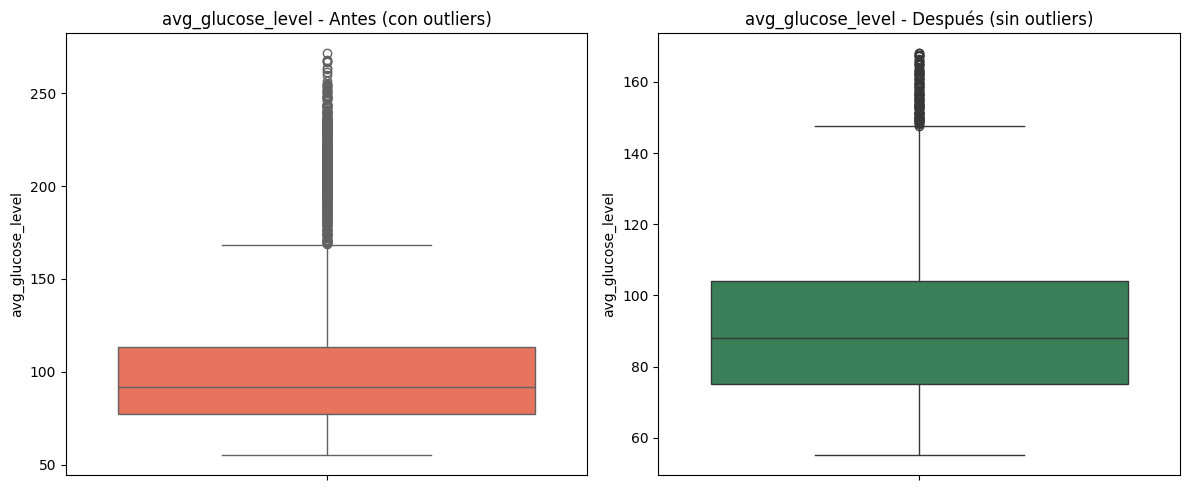

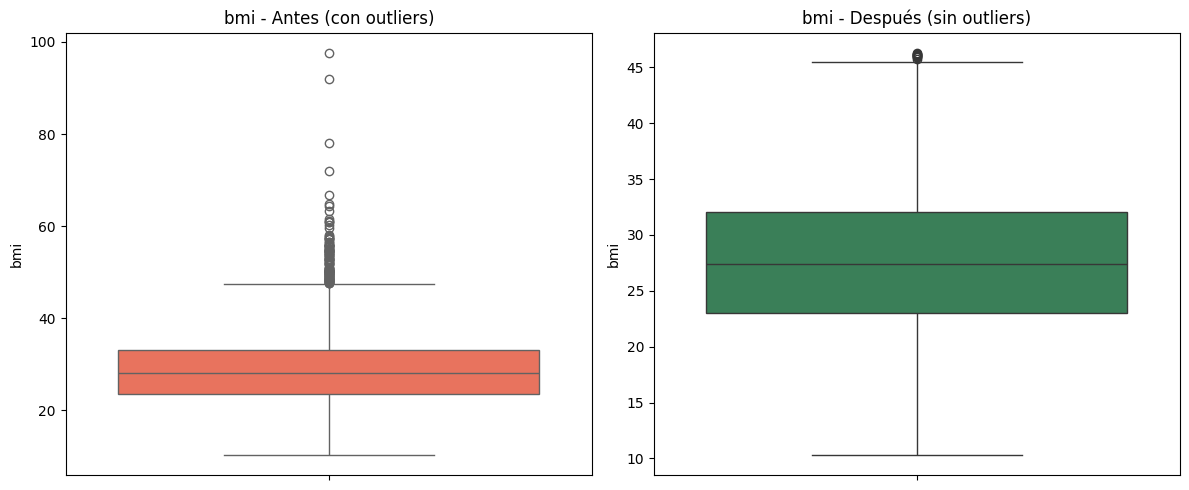

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del original para comparación
df_original = df.copy()

# Función para quitar outliers por IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicamos el filtro de outliers
df_clean = df.copy()
for col in ['age', 'avg_glucose_level', 'bmi']:
    df_clean = remove_outliers_iqr(df_clean, col)

# Función para graficar antes y después
def boxplot_comparison(before, after, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(y=before[column], ax=axes[0], color="tomato")
    axes[0].set_title(f"{column} - Antes (con outliers)")
    sns.boxplot(y=after[column], ax=axes[1], color="seagreen")
    axes[1].set_title(f"{column} - Después (sin outliers)")
    plt.tight_layout()
    plt.show()

# Mostramos los gráficos
for col in ['age', 'avg_glucose_level', 'bmi']:
    boxplot_comparison(df_original, df_clean, col)



1.3. Corregir errores tipográficos en variables categóricas
Ejemplo con la columna gender:

In [ ]:
# Ver valores únicos en la columna
print("Valores únicos de 'gender':", df_clean['gender'].unique())

# Normalizar errores comunes
df_clean['gender'] = df_clean['gender'].replace({
    'Femenno': 'Femenino',
    'Femmenino': 'Femenino',
    'Mascuulino': 'Masculino',
    'Masculno': 'Masculino'
})

#df_clean['gender'] = df_clean['gender'].str.lower().str.capitalize() (para hacer todo minuscula)


Valores únicos de 'gender': ['Male' 'Female' 'Other']


Paso 2: Codificar Variables

¿Qué es Codificar?

Transformar datos no numéricos en números

Ejemplo:

Género: "Femenino" → 0, "Masculino" → 1, "No binario" → 2.

Evita codificar variables sensibles si no es necesario (podrían causar sesgos).


## ⚖️ PASO 3 Técnicas para Mitigación de Sesgos
Paso 3.1: Verificamos el desbalance

In [ ]:
print(df_clean['gender'].value_counts(normalize=True))
print(df_clean['work_type'].value_counts(normalize=True))


gender
Female    0.593603
Male      0.406162
Other     0.000235
Name: proportion, dtype: float64
work_type
Private          0.566322
children         0.155691
Self-employed    0.147695
Govt_job         0.125118
Never_worked     0.005174
Name: proportion, dtype: float64


 Paso 3.2: Balanceo de datos


1.   Sobremuestreo del grupo minoritario (SMOTE, RandomOverSampler)  : Agregar más datos de grupos minoritarios.

2.   Submuestreo del grupo mayoritario (RandomUnderSampler) Reducir datos de grupos mayoritarios.







## Paso 4: Feature Engineering General


Transformaciones Matemáticas:

Normalización: Escalar variables a un rango común (ej.: 0 a 1).
Logaritmos: Para manejar valores extremos.

| Transformación                           | Cuándo usarla                                                                                                                                    | Librería                                           |
| ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------- |
| **MinMaxScaler (0 a 1)**                 | Cuando querés preservar la forma de la distribución pero llevar todo al mismo rango. Ideal para redes neuronales.                                | `from sklearn.preprocessing import MinMaxScaler`   |
| **StandardScaler (media 0, varianza 1)** | Cuando los datos tienen una distribución normal o simétrica. Común en regresión logística o SVM.                                                 | `from sklearn.preprocessing import StandardScaler` |
| **Log (np.log1p)**                       | Cuando hay valores **muy grandes** o sesgo a la derecha (distribución sesgada). Muy útil para `'avg_glucose_level'`, `'bmi'` si tienen outliers. | `import numpy as np`                               |


In [ ]:
#Antes de normalizar o estandarizar veremos si hay sesgos en los datos
import numpy as np

df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


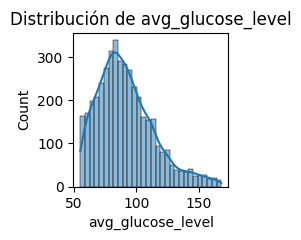

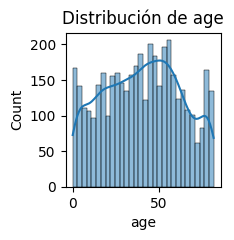

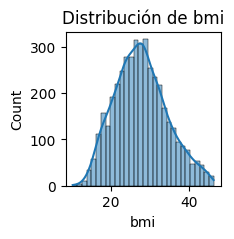

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = ['avg_glucose_level', 'age', 'bmi']  # Solo variables numéricas

for var in num_vars:
    plt.figure(figsize=(2,2))
    sns.histplot(df_clean[var], kde=True, bins=30)
    plt.title(f"Distribución de {var}")
    plt.show()


**Resumen de los sesgos de los datos**:

Usa log-transform para avg_glucose_level porque tiene sesgo positivo fuerte.

Prueba normalizar o estandarizar age y bmi para que las variables estén en rangos comparables.

No transformes las variables binarias (hypertension, heart_disease, stroke).



Segun el tipo de modelo que usaremos y segun la variable que usaremos:

Algunos modelos (como regresión logística, SVM o redes neuronales) se benefician mucho si las variables numéricas están escaladas (normalizadas o estandarizadas).

Otros modelos como árboles de decisión o random forests no necesitan transformaciones tan estrictas porque no se basan en distancias ni en escala de variables.

#Modelado con Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.20      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.57      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982

Confusion Matrix:
 [[925   4]
 [ 52   1]]
ROC AUC Score: 0.7864817109084632


<Axes: title={'center': 'Importancia de Variables'}>

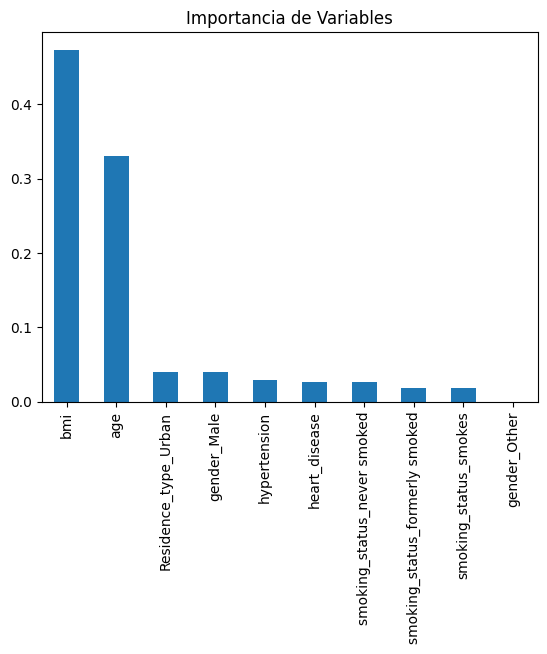

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Variables seleccionadas
features = ['age', 'bmi', 'hypertension', 'heart_disease',
            'gender', 'smoking_status', 'Residence_type']
target = 'stroke'

# Eliminar filas con valores nulos en variables seleccionadas
df = df[features + [target]].dropna()

# Codificar variables categóricas
cat_vars = ['gender', 'smoking_status', 'Residence_type']
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Separar variables X e y
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluación
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Importancia de Variables')


Según el gráfico de importancia, Estas dos variables dominan el modelo, con mucha más importancia que el resto.



bmi (índice de masa corporal)

age (edad)

Rendimiento del modelo:
Precisión global (accuracy): 94%

Precisión en clase 0 (sin stroke): 95%

Precisión en clase 1 (con stroke): 20%

Recall en clase 1: 2% ❌

Solo detectó 1 de 53 strokes verdaderos.

🔎 Problema identificado:
Hay un fuerte desbalance de clases:

929 casos sin stroke

53 con stroke

El modelo aprende a predecir la clase mayoritaria y apenas detecta los casos positivos, que son los más importantes.

##Conclusión breve
El modelo Random Forest logró una alta precisión global (94%), pero falló al predecir casos positivos de stroke (recall = 2%), debido al fuerte desbalance de clases. Las variables más influyentes fueron bmi y age. Se recomienda abordar el desbalance aplicando técnicas como class_weight, SMOTE u otros métodos de resampling para mejorar la detección de casos positivos.
Tambien podriamos probar con otros modelos como:

XGBoost (mayor precisión en desbalance)

Logistic Regression con regularización

Modelos de boosting con class_weight o focal loss